In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [67]:
df=pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
df.shape

(953, 24)

In [82]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [68]:
#changing 'object' type to 'numeric' to work with data
df['streams']=pd.to_numeric(df['streams'], errors='coerce')

In [56]:
#filtering data according to year 2023
v=df[df['released_year']==2023]
v

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,I'm Not Here To Make Friends,"Sam Smith, Calvin Harris, Jessie Reyez",3,2023,1,27,1890,0,103787664.0,86,...,115,NaN,Major,70,84,90,17,0,41,6
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790.0,88,...,122,G#,Major,64,25,89,0,0,15,9
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295.0,15,...,100,NaN,Major,79,60,68,7,0,26,4
398,Muï¿½ï¿½,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253.0,33,...,90,A#,Minor,68,83,71,3,0,31,8


# question 1: top 5 songs and their artists


In [69]:
top_songs_and_artists= df[['track_name','artist(s)_name','streams']].sort_values(by='streams',ascending=False).head()
top_songs_and_artists
#top songs and artists

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


Text(0.5, 1.0, 'Top 5 Songs and The Artists')

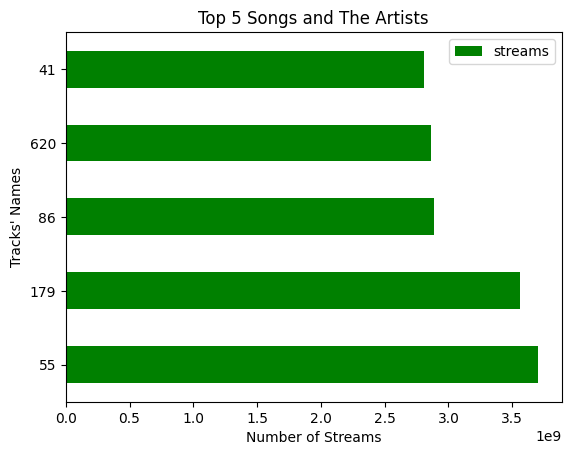

In [72]:
ax = top_songs_and_artists.plot.barh(color='green')
ax.set_xlabel("Number of Streams")
ax.set_ylabel("Tracks' Names")
ax.set_title("Top 5 Songs and The Artists")

# question 2: Songs over year on Spotify

In [71]:
year_song= df.groupby('released_year')['track_name'].count()
year_song
#filtering and grouping data for each year

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64

Text(0.5, 1.0, 'Released Songs over Yeras')

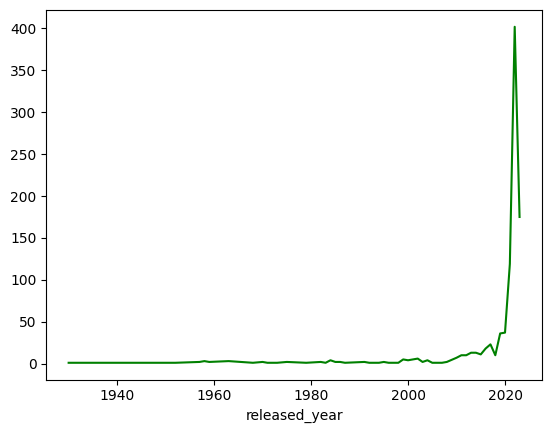

In [74]:
plt_1 = year_song.plot.line(
   color="green"
)
plt_1.set_xlabel("Released years")
plt_1.set_ylabel("Number of Tracks")
plt_1.set_title("Released Songs over Yeras")
#visualing songs over years on Spotify and which interval has more songs

In [76]:
year1= df[(df['released_year']>=2018) & (df['released_year']<=2023)]
year2=year1.groupby('released_year')['track_name'].count()
year2

released_year
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64

Text(0.5, 1.0, 'Released Songs over past 6 years')

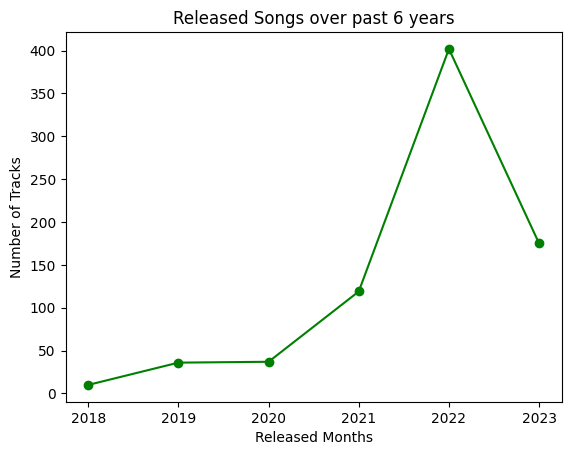

In [78]:
plt_2=year2.plot.line(color="green", marker="o")
plt_2.set_xlabel("Released Months")
plt_2.set_ylabel("Number of Tracks")
plt_2.set_title("Released Songs over past 6 years")


#final of the songs over 2018-2023

# released songs over months

In [56]:
month= df.groupby(by='released_month')['track_name'].count()
month

released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: track_name, dtype: int64

Text(0.5, 1.0, 'Released Songs over Months')

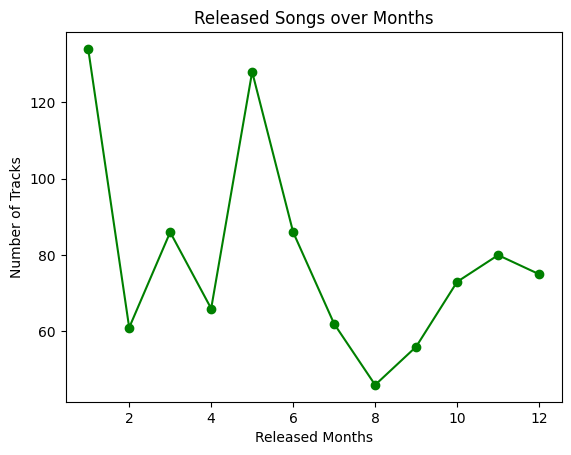

In [79]:
plt_3= month.plot.line(color="green",marker="o")
plt_3.set_xlabel("Released Months")
plt_3.set_ylabel("Number of Tracks")
plt_3.set_title("Released Songs over Months")


# release songs over days of a month

In [9]:
days=df.groupby(by='released_day')['track_name'].count()
days

released_day
1     95
2     39
3     32
4     39
5     25
6     39
7     39
8     25
9     36
10    37
11    22
12    17
13    43
14    26
15    21
16    20
17    28
18    19
19    25
20    39
21    44
22    33
23    23
24    40
25    28
26    13
27    21
28    21
29    23
30    22
31    19
Name: track_name, dtype: int64

<Axes: xlabel='released_day'>

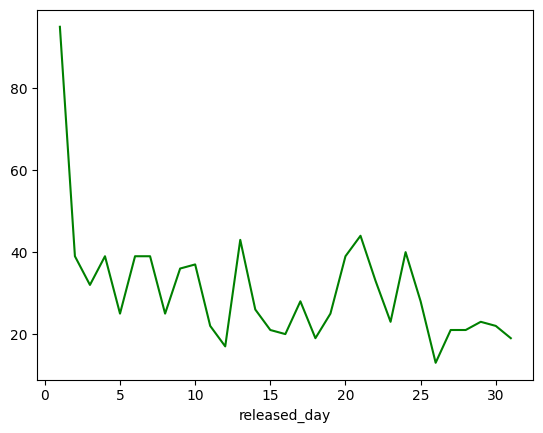

In [80]:
plt_4=days.plot.line( color='green')
plt_4

Text(0.5, 1.0, 'Relation between Spotify and Apple playlists')

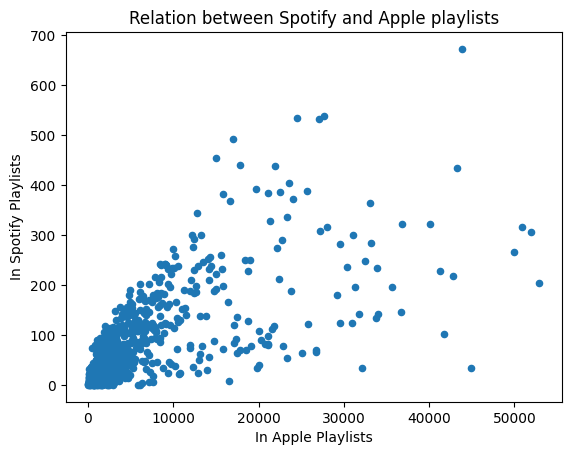

In [85]:
plt_5=df.plot(x="in_spotify_playlists", y="in_apple_playlists", kind="scatter")
plt_5.set_xlabel("In Apple Playlists")
plt_5.set_ylabel("In Spotify Playlists")
plt_5.set_title("Relation between Spotify and Apple playlists")
